In [28]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv("File/RoadSurfaceHouseTrading.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62847 entries, 0 to 62846
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        62847 non-null  int64  
 1   dien_tich         62430 non-null  float64
 2   huong_ban_cong    799 non-null    object 
 3   phong_ngu         36779 non-null  float64
 4   id_thanh_pho      62847 non-null  object 
 5   ten_thanh_pho     62847 non-null  object 
 6   id_quan           62846 non-null  object 
 7   ten_quan          62846 non-null  object 
 8   so_tang           46737 non-null  float64
 9   mat_tien          17404 non-null  float64
 10  noi_that          5091 non-null   object 
 11  huong_nha         6981 non-null   object 
 12  so_do             39574 non-null  object 
 13  lat               62803 non-null  float64
 14  long              62803 non-null  float64
 15  gia               60958 non-null  float64
 16  gia_m2            60750 non-null  float6

### Chọn ra quận Nam Từ Liêm

In [3]:
data = df[df["id_quan"] == "5e5501caeb80a7245175de33"].reset_index(drop=True)
print(data.shape)

(2713, 25)


## Sử dụng LabelEncoding để mã hóa dữ liệu
#### Kiểm tra các cột dữ liệu phân loại nominal:



In [4]:
objt = data.select_dtypes(include='object')
objt

,huong_ban_cong,id_thanh_pho,ten_thanh_pho,id_quan,ten_quan,noi_that,huong_nha,so_do,du_an,project_name,id_duong,ten_duong,do_rong_duong_ml,id_phuong,ten_phuong
0,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de33,Quận Nam Từ Liêm,NaN,NaN,Sổ hồng/ Sổ đỏ,NaN,NaN,NaN,NaN,Ngõ 1 ô tô,5e5501cbeb80a7245175e1ad,Phường Mỹ Đình 2
1,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de33,Quận Nam Từ Liêm,NaN,NaN,Sổ hồng/ Sổ đỏ,NaN,NaN,5e958eeb208d0d6d76490090,Đường Lê Quang Đạo,Ngõ 2 ô tô tránh,5e5501cbeb80a7245175e1ac,Phường Mỹ Đình 1
2,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de33,Quận Nam Từ Liêm,NaN,NaN,Sổ hồng/ Sổ đỏ,NaN,NaN,5e958eeb208d0d6d764900ad,đường Mỹ Đình,NaN,5e5501cbeb80a7245175e1ad,Phường Mỹ Đình 2
3,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de33,Quận Nam Từ Liêm,NaN,NaN,Sổ hồng/ Sổ đỏ,NaN,NaN,NaN,NaN,NaN,5e5501cbeb80a7245175e1a9,Phường Cầu Diễn
4,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de33,Quận Nam Từ Liêm,NaN,NaN,Sổ hồng/ Sổ đỏ,NaN,NaN,NaN,NaN,Ngõ 2 ô tô tránh,5e5501cbeb80a7245175e1b1,Phường Đại Mỗ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2708,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de33,Quận Nam Từ Liêm,NaN,KXĐ,NaN,NaN,NaN,5e958eeb208d0d6d76490084,Đường Hồ Tùng Mậu,Mặt phố - Mặt đường,NaN,NaN
2709,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de33,Quận Nam Từ Liêm,NaN,KXĐ,NaN,NaN,NaN,5e958eeb208d0d6d764900ad,Đường Mỹ Đình,Mặt phố - Mặt đường,NaN,NaN
2710,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de33,Quận Nam Từ Liêm,NaN,KXĐ,NaN,NaN,NaN,5e958eeb208d0d6d76490097,Đường Mễ Trì Hạ,Mặt phố - Mặt đường,NaN,NaN
2711,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de33,Quận Nam Từ Liêm,NaN,KXĐ,NaN,NaN,NaN,5e958eeb208d0d6d76490084,Đường Hồ Tùng Mậu,Mặt phố - Mặt đường,NaN,NaN


In [5]:
for col in objt.columns:
    missing_data = objt[col].isna().sum()
    missing_percent = missing_data/len(objt)*100
    print(f'Column {col}: has {missing_data} missing data, {missing_percent} %')    

Column huong_ban_cong: has 2689 missing data, 99.11537043862883 %
Column id_thanh_pho: has 0 missing data, 0.0 %
Column ten_thanh_pho: has 0 missing data, 0.0 %
Column id_quan: has 0 missing data, 0.0 %
Column ten_quan: has 0 missing data, 0.0 %
Column noi_that: has 2529 missing data, 93.21784002948765 %
Column huong_nha: has 2441 missing data, 89.97419830446 %
Column so_do: has 966 missing data, 35.60633984518983 %
Column du_an: has 2679 missing data, 98.74677478805751 %
Column project_name: has 2679 missing data, 98.74677478805751 %
Column id_duong: has 141 missing data, 5.197198673055658 %
Column ten_duong: has 141 missing data, 5.197198673055658 %
Column do_rong_duong_ml: has 118 missing data, 4.349428676741614 %
Column id_phuong: has 235 missing data, 8.661997788426097 %
Column ten_phuong: has 235 missing data, 8.661997788426097 %


#### Mã hóa các cột dữ liệu categorical:

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
obj = (data.dtypes == 'object')
for obj in list(obj[obj].index):
    data[obj] = label_encoder.fit_transform(data[obj])
data

for col in data.columns:
    missing_data = data[col].isna().sum()
    missing_percent = missing_data/len(data)*100
    print(f'Column {col}: has {missing_data} missing data, {missing_percent} %')  

Column Unnamed: 0: has 0 missing data, 0.0 %
Column dien_tich: has 23 missing data, 0.8477699963140436 %
Column huong_ban_cong: has 0 missing data, 0.0 %
Column phong_ngu: has 1078 missing data, 39.73461113158865 %
Column id_thanh_pho: has 0 missing data, 0.0 %
Column ten_thanh_pho: has 0 missing data, 0.0 %
Column id_quan: has 0 missing data, 0.0 %
Column ten_quan: has 0 missing data, 0.0 %
Column so_tang: has 818 missing data, 30.151124216734242 %
Column mat_tien: has 2138 missing data, 78.80575009214891 %
Column noi_that: has 0 missing data, 0.0 %
Column huong_nha: has 0 missing data, 0.0 %
Column so_do: has 0 missing data, 0.0 %
Column lat: has 1 missing data, 0.036859565057132324 %
Column long: has 1 missing data, 0.036859565057132324 %
Column gia: has 112 missing data, 4.128271286398821 %
Column gia_m2: has 138 missing data, 5.086619977884261 %
Column du_an: has 0 missing data, 0.0 %
Column project_name: has 0 missing data, 0.0 %
Column id_duong: has 0 missing data, 0.0 %
Column 

##### LOẠI BỎ 'do_rong_duong','mat_tien','so_tang','phong_ngu' vì quá nhiều missing_data

## Chuẩn hóa dữ liệu bằng StandardScaler


In [7]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
sdata = s_scaler.fit_transform(data)
col_names = list(data.columns)
sdata = pd.DataFrame(sdata, columns=col_names)
sdata


,Unnamed: 0,dien_tich,huong_ban_cong,phong_ngu,id_thanh_pho,ten_thanh_pho,id_quan,ten_quan,so_tang,mat_tien,...,gia,gia_m2,du_an,project_name,id_duong,ten_duong,do_rong_duong,do_rong_duong_ml,id_phuong,ten_phuong
0,-1.731412,-0.134251,0.076326,-0.263736,0.0,0.050861,0.0,0.050861,-0.861186,-0.416945,...,-0.147152,-0.158434,0.100758,0.098785,1.737829,1.990603,-0.618954,0.524095,-0.195763,-0.220945
1,-1.730136,-0.185675,0.076326,-0.213172,0.0,0.050861,0.0,0.050861,-0.113957,-0.275967,...,-0.149332,-0.143128,0.100758,0.098785,-0.713117,-0.827379,-0.486434,1.298535,-0.553408,-0.556946
2,-1.728859,-0.172819,0.076326,-0.364863,0.0,0.050861,0.0,0.050861,-1.608414,-0.416945,...,-0.128403,-0.088601,0.100758,0.098785,-0.100381,1.729679,NaN,4.396293,-0.195763,-0.220945
3,-1.727582,-0.087968,0.076326,-0.314300,0.0,0.050861,0.0,0.050861,-1.608414,-0.416945,...,-0.136251,-0.150413,0.100758,0.098785,1.737829,1.990603,NaN,4.396293,-1.626345,-1.228947
4,-1.726305,-0.206245,0.076326,-0.213172,0.0,0.050861,0.0,0.050861,-0.487572,-0.473336,...,-0.154128,-0.147792,0.100758,0.098785,1.737829,1.990603,-0.486434,1.298535,1.234820,1.795058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2708,1.726305,0.097160,0.076326,NaN,0.0,0.050861,0.0,0.050861,NaN,NaN,...,-0.063000,-0.111560,0.100758,0.098785,-0.935931,-1.036118,NaN,-0.250344,1.950111,2.131058
2709,1.727582,4.468255,0.076326,NaN,0.0,0.050861,0.0,0.050861,NaN,2.543579,...,2.579257,-0.007934,0.100758,0.098785,-0.100381,-0.253346,1.832659,-0.250344,1.950111,2.131058
2710,1.728859,-0.057114,0.076326,NaN,0.0,0.050861,0.0,0.050861,1.380500,-0.275967,...,-0.023759,0.007062,0.100758,0.098785,-0.378898,-0.409900,-0.155135,-0.250344,1.950111,2.131058
2711,1.730136,-0.177961,0.076326,NaN,0.0,0.050861,0.0,0.050861,-0.113957,-0.388749,...,-0.095702,0.016850,0.100758,0.098785,-0.935931,-1.036118,NaN,-0.250344,1.950111,2.131058


In [8]:
# các thuộc tính định lượng
quantiatives = ['dien_tich','lat','long','gia','gia_m2']

categorical = ['huong_ban_cong','huong_nha','so_do','du_an','id_duong','do_rong_duong_ml']

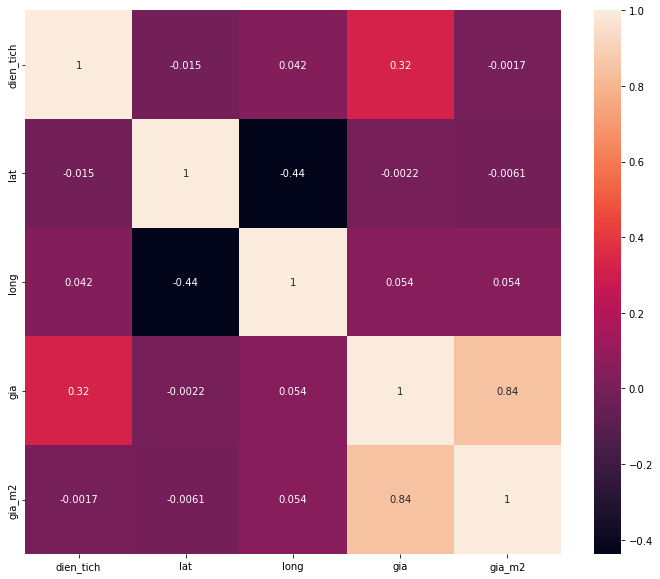

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

corr_fields = ['dien_tich','lat','long','gia','gia_m2']

qtt = sdata.loc[:, corr_fields]
plt.figure(figsize=(12,10))
sns.heatmap(qtt.corr(), annot=True)
plt.show()

##### Biểu đồ heatmap trên cho thấy các biến định lượng: gia, long, dien_tich,lat có tương quan với giá nhà gia_m2 vì có sai số rất nhỏ.


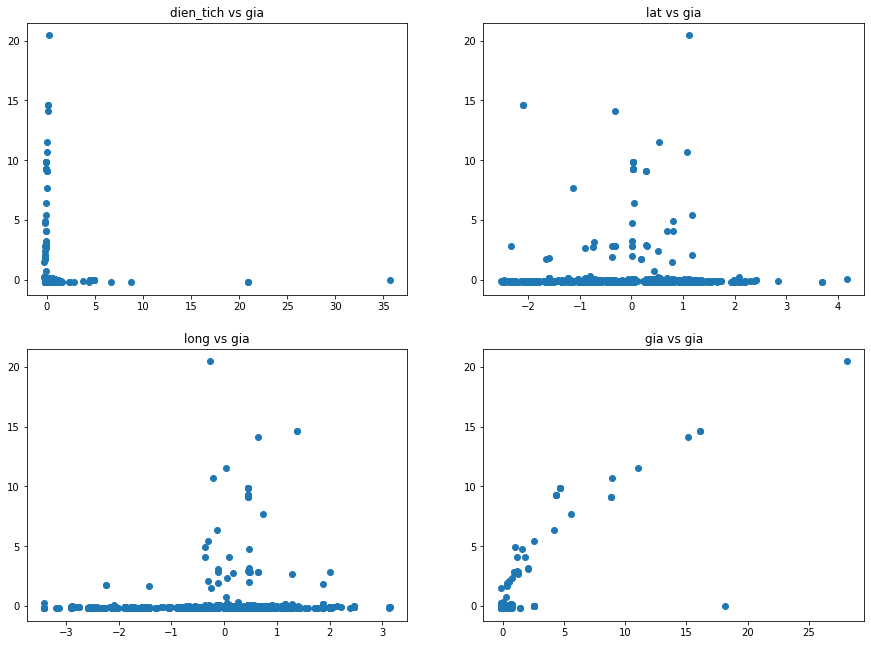

In [10]:
from matplotlib import pyplot as plt

fig,axs = plt.subplots(2,2)
fig.set_size_inches(15,11)
axs[0,0].scatter(sdata.dien_tich, sdata.gia_m2)
axs[0,0].set_title("dien_tich vs gia")
axs[0,1].scatter(sdata.lat, sdata.gia_m2)
axs[0,1].set_title("lat vs gia")
axs[1,0].scatter(sdata.long, sdata.gia_m2)
axs[1,0].set_title("long vs gia")
axs[1,1].scatter(sdata.gia, sdata.gia_m2)
axs[1,1].set_title("gia vs gia")

plt.show()

#### Chuẩn bị dữ liệu train và tạo mô hình

In [11]:
def get_index_remove(df, column):
    data = df[column].values

    upper_quartile = np.percentile(data, 75)
    lower_quartile = np.percentile(data, 25)

    iqr = upper_quartile - lower_quartile
    lower_value = lower_quartile-1.5*iqr
    upper_value = upper_quartile+1.5*iqr


    index = []
    lower_idx =  df[df[column]<=lower_value].index
    index.extend(lower_idx)

    upper_idx =  df[df[column]>=upper_value].index
    index.extend(upper_idx)
    return index

In [12]:
features = data[['lat','long','dien_tich','gia']]

target_df = data[['lat','long','dien_tich','gia']]
target_df = target_df.dropna().reset_index(drop=True)

list_index_remove = []
for col in features:
    outlier = get_index_remove(features,col)
    list_index_remove.extend(outlier)

print("length of list index outlier: ",len(list_index_remove))
print(features)

length of list index outlier:  0
            lat        long  dien_tich       gia
0     21.029807  105.769080       60.0    4700.0
1     21.017492  105.767232       40.0    4200.0
2     21.027487  105.774590       45.0    9000.0
3     21.033376  105.759491       78.0    7200.0
4     20.996166  105.756067       32.0    3100.0
...         ...         ...        ...       ...
2708  21.038727  105.770971      150.0   24000.0
2709  21.029504  105.769080     1850.0  630000.0
2710  21.029504  105.769080       90.0   33000.0
2711  21.038727  105.770971       43.0   16500.0
2712  21.005527  105.779133      120.0   20000.0

[2713 rows x 4 columns]


In [13]:
features = data[['lat','long','dien_tich','gia']]

features.dropna(subset=['lat','long','dien_tich','gia'], inplace=True)

print(features.shape)

(2586, 4)


C:\Users\Admin\AppData\Local\Temp\ipykernel_18804\1321773727.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(subset=['lat','long','dien_tich','gia'], inplace=True)


In [14]:
target = data[['gia_m2']]

target.dropna(subset=['gia_m2'],inplace=True)

print(target.shape)

(2575, 1)


C:\Users\Admin\AppData\Local\Temp\ipykernel_18804\3842758347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.dropna(subset=['gia_m2'],inplace=True)


In [15]:
clean_df = target_df.drop(list_index_remove, axis=0).reset_index(drop=True)
print(clean_df)

            lat        long  dien_tich       gia
0     21.029807  105.769080       60.0    4700.0
1     21.017492  105.767232       40.0    4200.0
2     21.027487  105.774590       45.0    9000.0
3     21.033376  105.759491       78.0    7200.0
4     20.996166  105.756067       32.0    3100.0
...         ...         ...        ...       ...
2581  21.038727  105.770971      150.0   24000.0
2582  21.029504  105.769080     1850.0  630000.0
2583  21.029504  105.769080       90.0   33000.0
2584  21.038727  105.770971       43.0   16500.0
2585  21.005527  105.779133      120.0   20000.0

[2586 rows x 4 columns]


In [35]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

x_columns = features
y_columns = target

X = clean_df[['lat','long','dien_tich','gia']].values
y = clean_df[target].values

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [32]:
x_train_ne

array([[4.94715816e-01, 4.72732639e-01, 4.07230121e-03, 8.02468982e-04],
       [3.28804370e-01, 6.18256953e-01, 6.21561763e-03, 2.00617269e-03],
       [6.77592913e-01, 4.15270176e-02, 3.00064299e-03, 8.56481327e-04],
       ...,
       [5.74306438e-01, 1.52038256e-01, 3.21497464e-03, 5.86419599e-04],
       [1.22771778e-01, 8.34055913e-01, 4.07230121e-03, 1.31172824e-03],
       [1.04975350e-01, 5.54412995e-01, 3.35786240e-03, 1.31172824e-03]])

In [36]:
# LinearRegression model
LR = LinearRegression()
LR.fit(x_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [31]:
# RandomForestRegressor model
RF = RandomForestRegressor()
RF.fit(rescaledx, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [26]:

# DecisionTreeRegressor model
DT = DecisionTreeRegressor()
DT.fit(rescaledx, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
LR_y_pred = LR.predict(scaler.transform(x_test))
RF_y_pred = RF.predict(scaler.transform(x_test))
DT_y_pred = DT.predict(scaler.transform(x_test))

print(f'LinearRegression: r2 score: {r2_score(y_test, LR_y_pred)} - MSE: {mean_squared_error(y_test, LR_y_pred)} - RMSE: {np.sqrt(mean_squared_error(y_test, LR_y_pred))}')
print(f'RandomForestRegressor: r2 score: {r2_score(y_test, RF_y_pred)} - MSE: {mean_squared_error(y_test, RF_y_pred)} - RMSE: {np.sqrt(mean_squared_error(y_test, RF_y_pred))}')
print(f'DecisionTreeRegressor: r2 score: {r2_score(y_test, DT_y_pred)} - MSE: {mean_squared_error(y_test, DT_y_pred)} - RMSE: {np.sqrt(mean_squared_error(y_test, DT_y_pred))}')
